# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [16]:
data = pd.DataFrame(pd.read_csv('weight-height.csv'))
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

for df, gender in [(male_df, 'Male'), (female_df, 'Female')]:
    print(f'{gender} Height mean: {df.mean()[0]}')
    print(f'{gender} Height sd: {df.std()[0]}')
    print(f'{gender} Weight mean: {df.mean()[1]}')
    print(f'{gender} Weight mean: {df.std()[1]}')

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight mean: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight mean: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

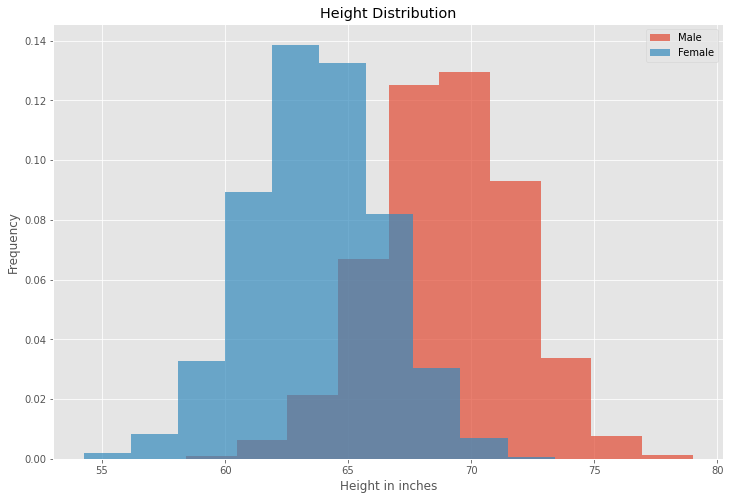

In [42]:
# Your code here
plt.figure(figsize=(12,8))
plt.hist(male_df['Height'], bins=10, alpha=0.7, label='Male', density=True)
plt.hist(female_df['Height'], bins=10, alpha=0.7, label='Female', density=True)
plt.legend()
plt.title('Height Distribution')
plt.xlabel('Height in inches')
plt.ylabel('Frequency');

In [43]:
# Record your observations - are these inline with your personal observations?

# Dist. of female heights has a lower peak (~63) than male (~70), suggesting higher spread in male heights
# Female dist. has a left-skew, and males have a right-skew
# This seems inline with my anecdotal experience, that females are generally shorter than males

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

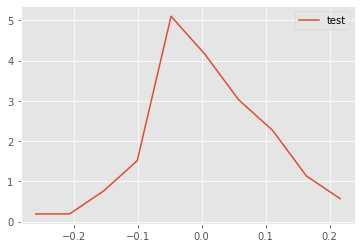

In [85]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for j in range(n.size):
        pdfx[j] = 0.5*(bins[j]+bins[j+1])
        pdfy[j] = n[j]
    return pdfx, pdfy
    
# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend();


## Add overlapping density plots to the histograms plotted earlier

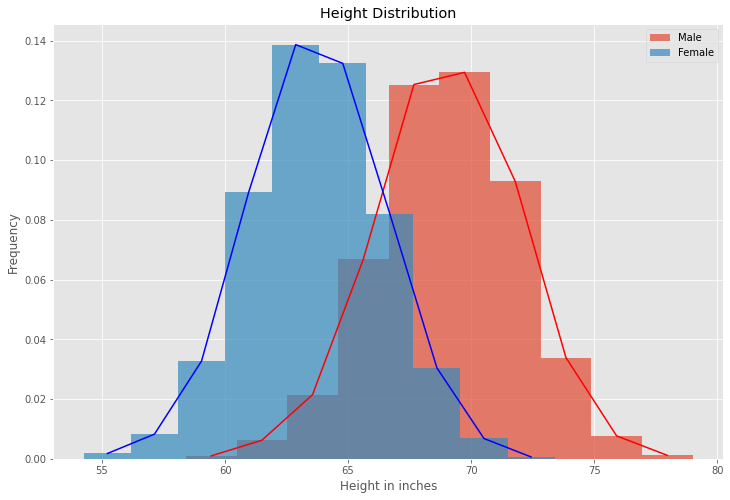

In [82]:
# Your code here
plt.figure(figsize=(12,8))
plt.hist(male_df['Height'], bins=10, alpha=0.7, label='Male', density=True)
plt.hist(female_df['Height'], bins=10, alpha=0.7, label='Female', density=True)
plt.legend()
plt.title('Height Distribution')
plt.xlabel('Height in inches')
plt.ylabel('Frequency');
x,y = density(male_df.Height)
plt.plot(x,y, color='red')
x,y = density(female_df.Height)
plt.plot(x,y, color='blue');

## Repeat the above exercise for male and female weights

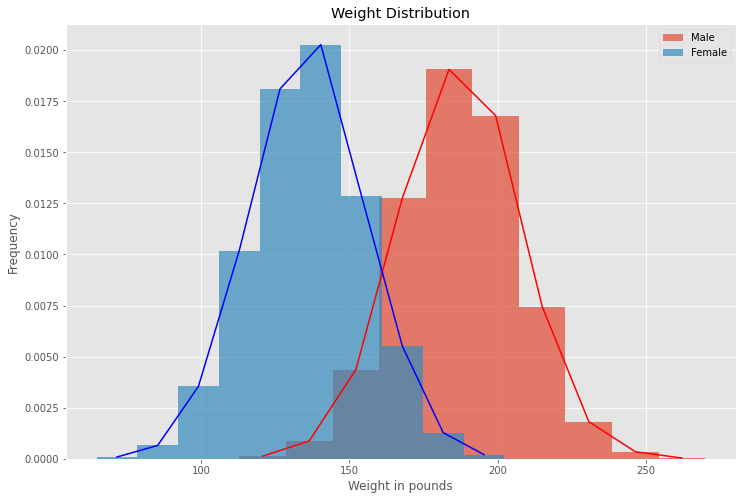

In [97]:
# Your code here
plt.figure(figsize=(12,8))
plt.hist(male_df['Weight'], bins=10, alpha=0.7, label='Male', density=True)
plt.hist(female_df['Weight'], bins=10, alpha=0.7, label='Female', density=True)
plt.legend()
plt.title('Weight Distribution')
plt.xlabel('Weight in pounds')
plt.ylabel('Frequency');
x,y = density(male_df.Weight)
plt.plot(x,y, color='red')
x,y = density(female_df.Weight)
plt.plot(x,y, color='blue');

## Write your observations in the cell below

In [86]:
# Record your observations - are these inline with your personal observations?

# Yes, weight and height are similarly higher for M and lower for F
# For both, male variation is higher
# Weight: most M are around 180lbs, most F are around 130lbs

# What is the takeaway when comparing male and female heights and weights?

# There is a bigger difference between M/F in weights than heights

## Repeat the above experiments in seaborn and compare with your results

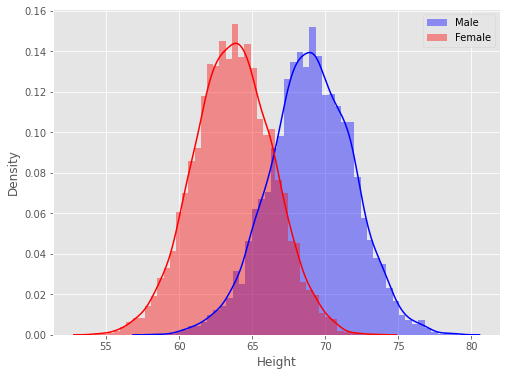

In [105]:
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

fig = plt.figure(figsize=(8,6))
sns.distplot(male_df.Height, label='Male', color='blue')
sns.distplot(female_df.Height, label='Female', color='red')
plt.legend();

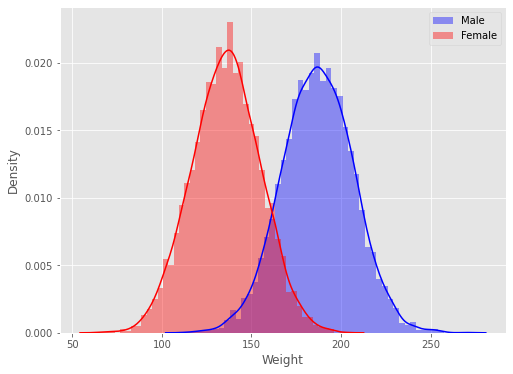

In [106]:
fig = plt.figure(figsize=(8,6))
sns.distplot(male_df.Weight, label='Male', color='blue')
sns.distplot(female_df.Weight, label='Female', color='red')
plt.legend();

In [107]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

# Seems similar overall, and is much more granular (by default here)
# Thus, it seems at first glance to be higher-resolution without any adjusting
# plt.hist() requires much more fiddling and calculating (density(), bin sizes)
# sns.distplot() seems to just do all that work automatically

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.